![Datacademy](datacedemy_cover-4e7c157b-7470-47f8-9b37-ad34dd129c6d.png)

# Platzi Datacademy 2022 | Final Project

## USA 25 Largest retailers Data Analysis

By Violeta Ana Luz Sosa León **@violetasdev**

### Context: working as an retail data analyst


_Imagina que acabas de iniciar tu primer trabajo como **Data Analyst** para una nueva empresa de retail en Estados Unidos. Managers de ventas quieren conocer ciertos aspectos de otras empresas y te piden analizar datos de otras 25 compañías muy exitosas en el país._

_Como dato, retail es el sector económico de empresas que se especializan en comercialización masiva de productos o servicios uniformes a grandes cantidades de clientes. Por ejemplo Walmart, Amazon, Target, Home Depot, Best Buy, etc._

### Dataset Overview

En este proyecto se trabajará con un pequeño dataset con los datos de 25 compañías muy exitosas en Estados Unidos. Este dataset es una versión simplificada del dataset [Largest US Retailers de Gary Hoover](https://www.kaggle.com/yamqwe/largest-us-retailers-2015e).

Dentro de este dataset se encuentran las siguientes variables/columnas:

+ Company (compañía)
+ Sales (ventas en millones de dólares)
+ Stores (cantidad de tiendas físicas)
+ Sales/Avg. Store (promedio de venta por tienda física)
+ Category (categoría)

### Actividad del reto

Imagina que los managers te hacen ciertas preguntas clave. **Tu labor será responderlas buscando esos insights analizando los datos.** Para ello usa las librerías que has conocido a lo largo de las clases del reto. No existe una única sola forma de llegar al resultado, siéntete libre de explorar los datos como mejor te parezca con estas herramientas. Lo que importa al final es llegar a un resultado que sea de valor para el negocio.

## Empieza el reto!

The libraries included in the challenge are:


In [ ]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias adicionales
import matplotlib.ticker as mticker
import plotly


To import the data assigned for this task:

In [ ]:
# Importar datos aquí
df=pd.read_csv('largest_us_retailers.csv')

### Overview del dataset

**1.** Initially, we do an exploration of the dataset to get familiar with the variables, type and format.

In [ ]:
df.head(25)


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


We can see that there is a typo in the category *Warehouse Club*, we can correct this by:

In [ ]:
df.at[10,'Category']='Warehouse Club'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


We have 6 variables, most of them **numeric**.

**2.** Evaluate if we have *Null* or *NaN* values:

In [ ]:
df.isnull().sum().sum()

7

In [ ]:
df.isnull().sum()

Company               0
Sales                 0
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              1
dtype: int64

We found that at least 7 null fields, which are in the following columns: ``` Stores, Sales/Avg. Store, Store Count Growth``` y ```Category```

Con analista de retail, estaremos interesados en revisar las ventas por companía, pero esto puede depender de factores como la cantidad de tiendas disponibles. Esta primera exploración nos permite evidenciar qué se podría esperar de los datos, si es necesario revisar outliers ó si la dimensión de los datos es adecuada para visualizar ó calcular estadísticos.


In [ ]:
(lambda: DeepnoteChart(df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"Company","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Stores","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"quantitative","field":"Sales","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"Company","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Stores","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"quantitative","field":"Sales","scale":{"type":"linear","zero":false}}}}"""))()

alt.Chart(...)

Por lo visto, **Walmart** posee el nivel más alto de ventas, a pesar de no tener el mismo número de tiendas que los demás competidores. Un indicador de que Walmart va a ser un protagonista del análisis.

### I. Bussiness questions

#### 1. What is the average sales without counting the dominant company? (¿Cuál es el promedio de ventas sin contar a la compañía dominante?)

In [ ]:
# Identificar la compañia dominante dentro del dataset agrupando por compañia, 
# generando el promedio de ventas y extraer el valor maximo
# esto con el fin de asegurarnos de tener todos los valores de la misma compañia juntos

df_dominant=df.groupby(['Company'])['Sales'].mean().reset_index().max()
print(f"Dominant company: {df_dominant['Company']}")

# Remover la compania dominante por identificador 'Company'
df_no_dominant=df[df['Company']!=df_dominant['Company']]

# Del dataframe sin la compania dominante, calcular el promedio
print(f"Sales mean without {df_dominant['Company']}: ${round(df_no_dominant.mean()['Sales'], 2)}")


Dominant company: Walmart US
Sales mean without Walmart US: $46602.42


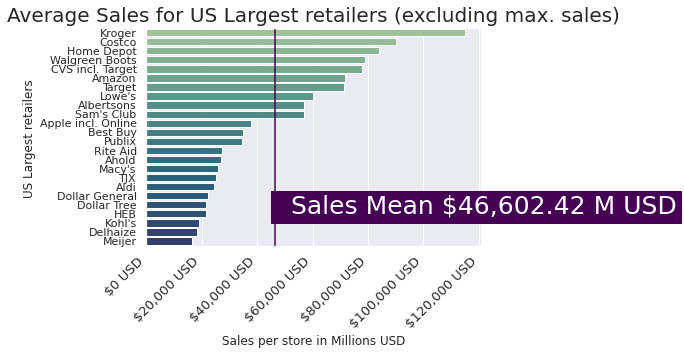

In [ ]:
sns.despine(left=True)
sns.set(rc = {'figure.figsize':(20,10)})

# Creating plot
g=sns.barplot(data=df_no_dominant,y='Company', x='Sales', palette="crest")


#Formating X labels
xlabels = ['${:,.0f}'.format(x) + ' USD' for x in g.get_xticks()]
ticks_loc = g.get_xticks().tolist()
g.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
g.set_xticklabels(xlabels, rotation=45, horizontalalignment='right',fontsize='13')

# Formating plot
plt.title('Average Sales for US Largest retailers (excluding max. sales)', fontsize=20)
plt.ylabel('US Largest retailers ')
plt.xlabel('Sales per store in Millions USD')

# Adding Mean Line
plt.axvline(df_no_dominant['Sales'].mean(), color='#440154FF')
plt.text(size=25,x = df_no_dominant['Sales'].mean(), y=20, s='  Sales Mean ${:,.2f} M USD'.format(df_no_dominant['Sales'].mean()), color = 'white').set_backgroundcolor('#440154FF')

The Mean Sales for all companies without the dominant one (Walmart US) accounts for **$46.602,42 million USD**. It is also noticeable that big and small sellers can be differentiated from this value, with **Sam's Club** separating the big sales from the small sales.

#### 2. How much money in sales did most companies make? (¿Cuánto dinero en ventas generó la mayoría de las compañías?)

In [ ]:
df.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


In [ ]:
df.median()

Sales                 34980.000000
Stores                 1828.000000
Sales/Avg. Store         25.997733
Store Count Growth        0.019520
dtype: float64

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Sales in Millions USD')

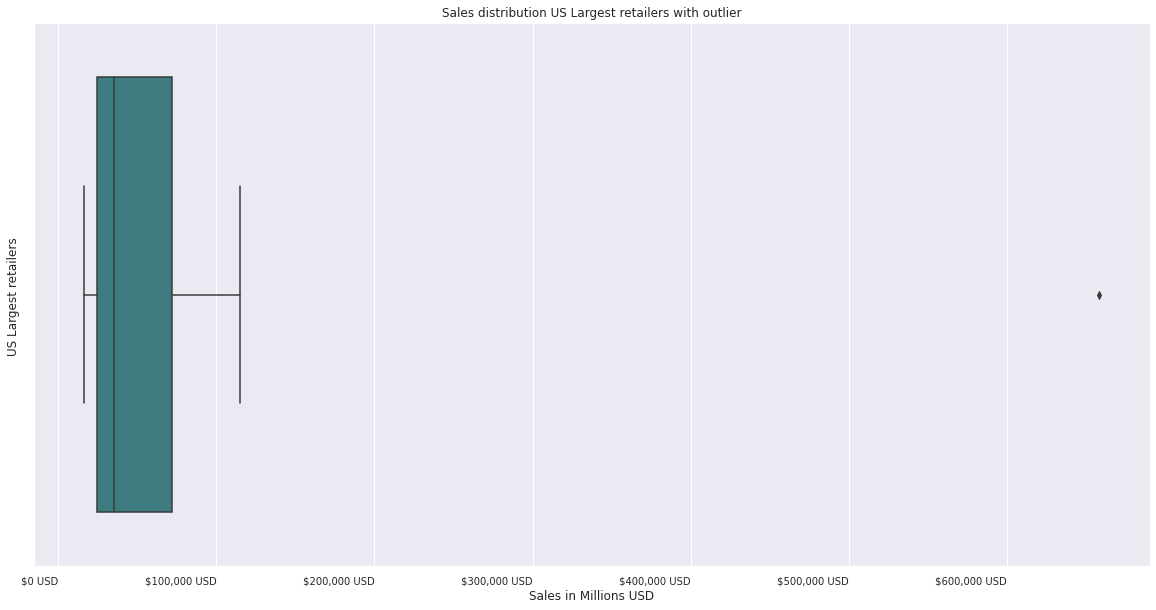

In [ ]:
sns.set()
g=sns.boxplot(data=df, x='Sales', orient='v', palette="crest")

#Formating X labels
xlabels = ['${:,.0f}'.format(x) + ' USD' for x in g.get_xticks()]
ticks_loc = g.get_xticks().tolist()
g.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
g.set_xticklabels(xlabels, horizontalalignment='right',fontsize='10')

# Formating plot
plt.title('Sales distribution US Largest retailers with outlier')
plt.ylabel('US Largest retailers ')
plt.xlabel('Sales in Millions USD')

Considering all companies, most of the Sales account for **$34.980 USD Millions**. Nevertheless, as seen in the Figure above, one company alone possesses a large number of millions in sales. We review the result without it

In [ ]:
df_no_dominant.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,24.000000,22.000000,22.000000,22.000000
mean,46602.416667,3416.227273,35.562840,0.041475
std,28317.981841,4126.358592,41.082510,0.069899
min,16592.000000,231.000000,1.563919,-0.059515
25%,23860.000000,959.000000,10.537195,-0.002790
50%,34694.000000,1800.000000,25.341845,0.026687
75%,71327.750000,3640.750000,38.598240,0.079281
max,115037.000000,14250.000000,187.795620,0.255662


In [ ]:
df_no_dominant.median()

Sales                 34694.000000
Stores                 1800.000000
Sales/Avg. Store         25.341845
Store Count Growth        0.026687
dtype: float64

Text(0.5, 0, 'Sales in Millions USD')

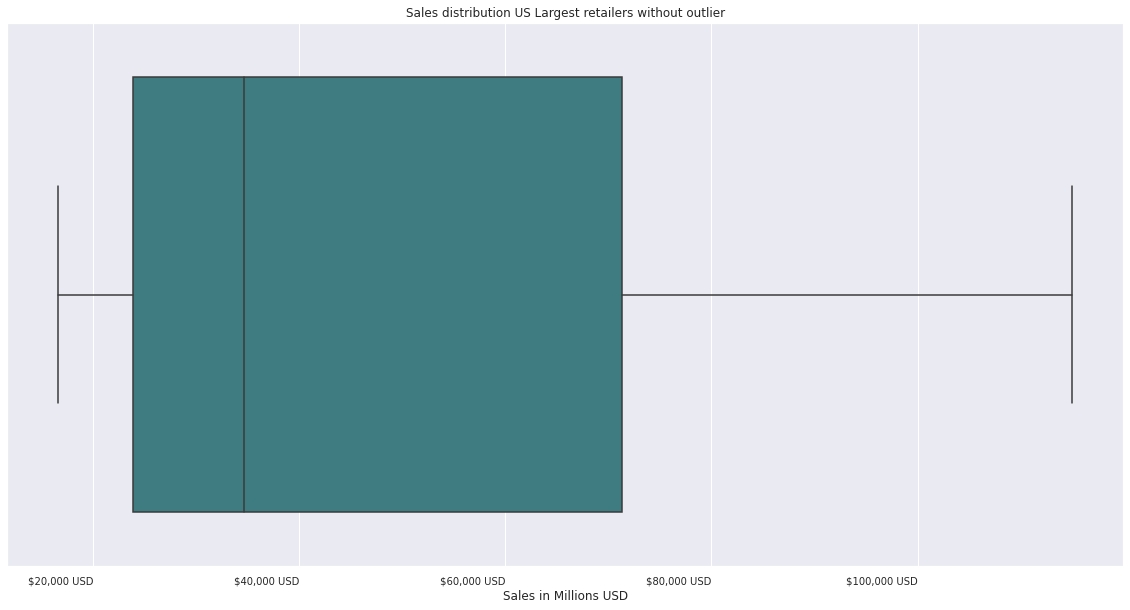

In [ ]:
sns.set()
g=sns.boxplot(data=df_no_dominant, x='Sales', palette="crest")

#Formating X labels
xlabels = ['${:,.0f}'.format(x) + ' USD' for x in g.get_xticks()]
ticks_loc = g.get_xticks().tolist()
g.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
g.set_xticklabels(xlabels, horizontalalignment='right',fontsize='10')

# Formating plot
plt.title('Sales distribution US Largest retailers without outlier')
plt.xlabel('Sales in Millions USD')

By removing the outlier, is easier to review in the figure above that most of the Sales account for **$34.694**.

#### 3. How many stores do most companies have? (¿Cuántas tiendas tiene la mayoría de las compañías?)

In [ ]:
df.median()

Sales                 34980.000000
Stores                 1828.000000
Sales/Avg. Store         25.997733
Store Count Growth        0.019520
dtype: float64

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Number of Stores')

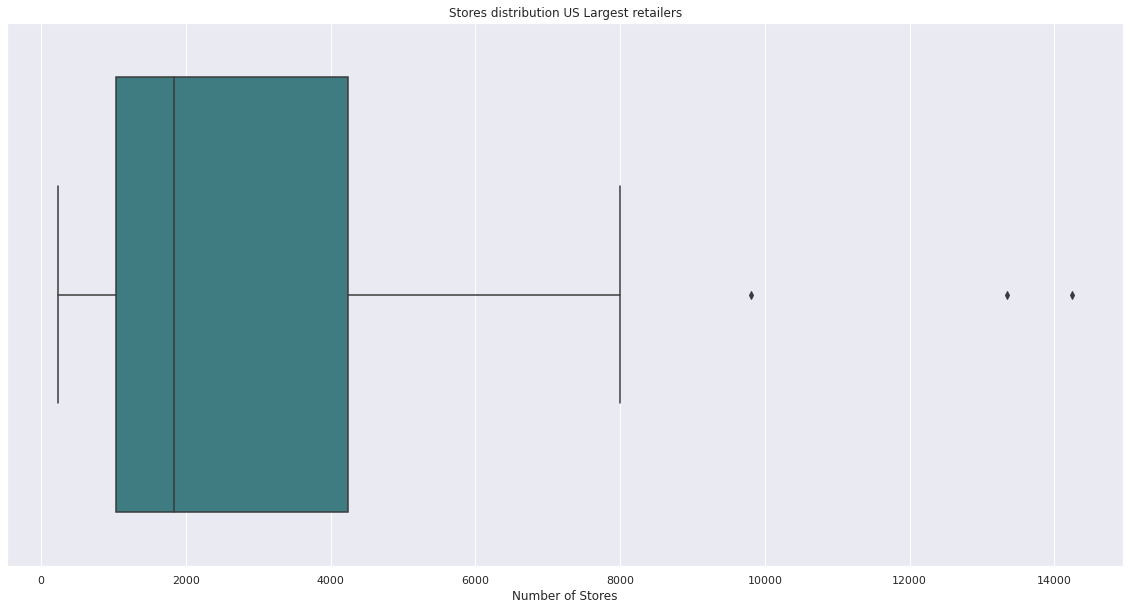

In [ ]:
sns.set()
g=sns.boxplot(data=df, x='Stores', orient='v', palette="crest")

# Formating plot
plt.title('Stores distribution US Largest retailers')
plt.xlabel('Number of Stores')

Most companies have **1828 Stores**. To find out which companies have an _unusual_ number of stores for the sample, we identify the outliers using the Interquartile Range:

In [ ]:
# Q1 & Q3
Q1=df['Stores'].quantile(0.25)
Q3=df['Stores'].quantile(0.75)

#IQR 
IQR=Q3-Q1

#LIMITS
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)


outliers_store=df[(df.Stores <= lower_limit) | (df.Stores >= upper_limit)]['Company']
outliers_store

5     CVS incl. Target
19      Dollar General
20         Dollar Tree
Name: Company, dtype: object

Companies like **CVS incl. Target, Dollar General,** and **Dollar Tree** have more than 8000 stores, which accounts for almost four times the number of stores that most companies have.

#### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

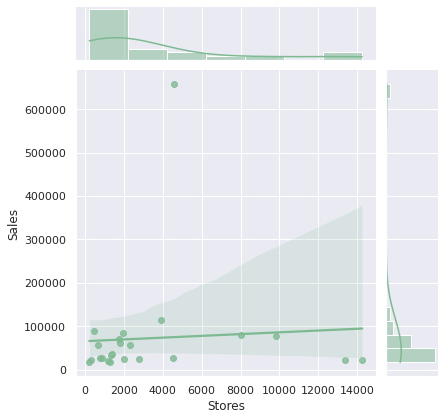

In [ ]:
sns.set(palette='crest',rc = {'figure.figsize':(25,15)})
sns.jointplot(data=df, x='Stores', y='Sales', kind='reg' )



Text(0.5, 1.0, 'Stores vs Sales Correlation Heatmap')

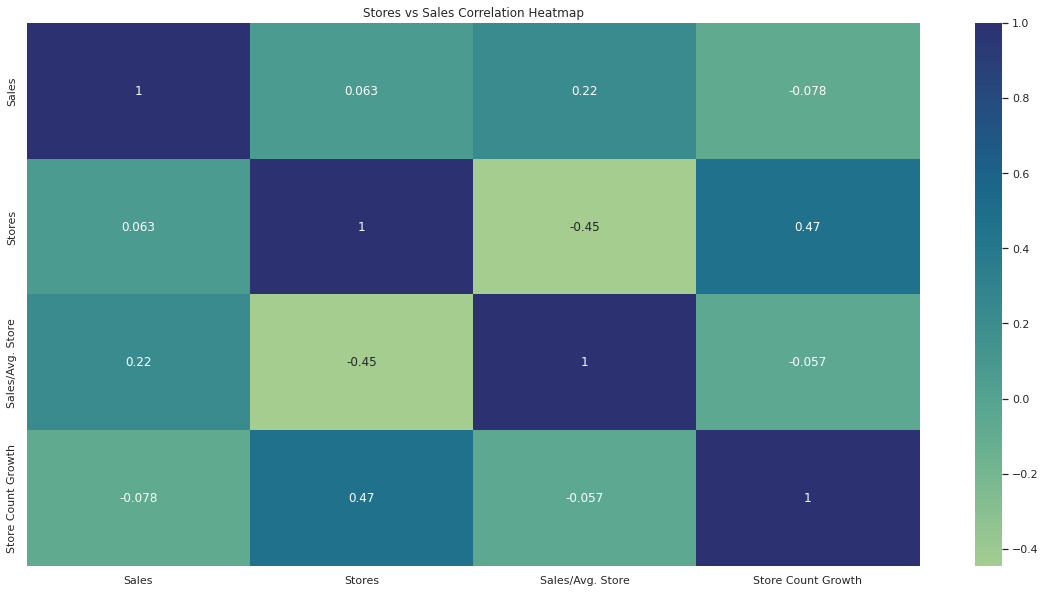

In [ ]:
sns.heatmap(df.corr(), cmap='crest', annot=True)
plt.title('Stores vs Sales Correlation Heatmap')

There is no evidence of a clear correlation between **Sales** and **Stores**from the joint plot. Secondly, from the Correlation Heatmap, the correlation score is low to conclude a correlation between the both, 0.063. Additionally, from the previous analysis, we know:

- There are *Null* values for the *Stores* variable, as some companies do not have physical stores
- Secondly, we know there are some companies with an unusual number of stores

Thus, we proceed to analyze the data without them to review if there is a correlation:

Text(0.5, 0, 'Number of Stores')

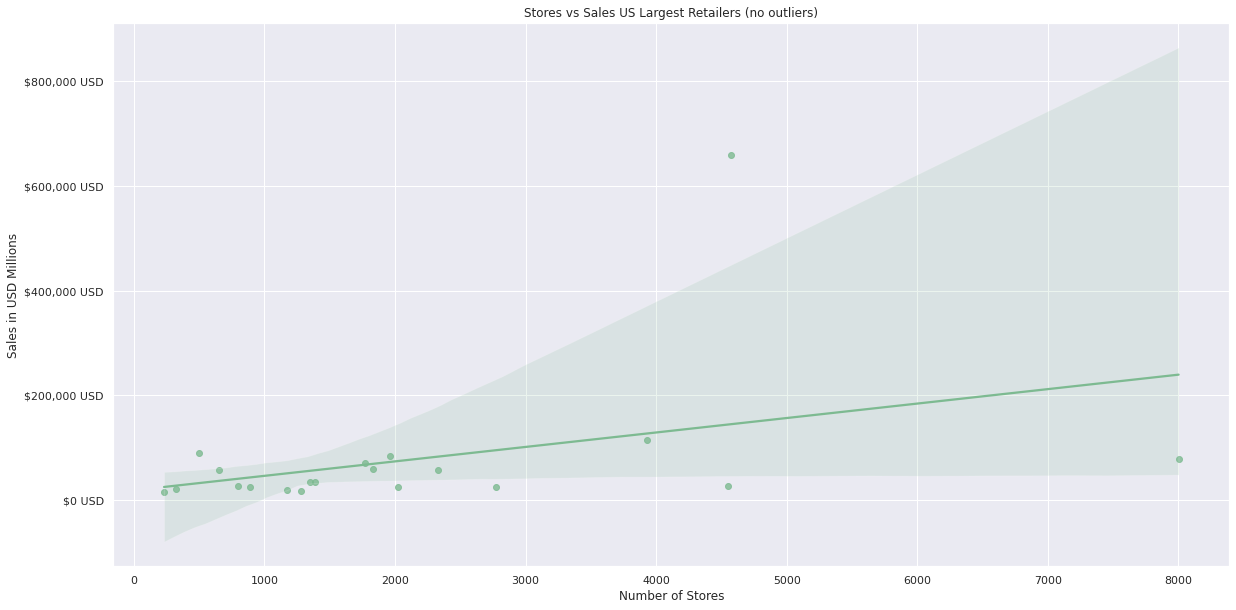

In [ ]:
# Filter companies with no stores
with_stores=df[~df.Stores.isnull()]

# Filter companies with unsual number of stores
df_no_store_outliers=with_stores[~with_stores.Company.isin(outliers_store)]

# Plot the results
sns.set(palette='crest')
#g=sns.jointplot(data=df_no_store_outliers, x='Stores', y='Sales', kind='reg' )
g=sns.regplot(data=df_no_store_outliers, x='Stores', y='Sales')

#Formating X labels
ylabels = ['${:,.0f}'.format(x) + ' USD' for x in g.get_yticks()]
ticks_loc = g.get_yticks().tolist()
g.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
g.set_yticklabels(ylabels)

# Formating plot
plt.title('Stores vs Sales US Largest Retailers (no outliers)')
plt.ylabel('Sales in USD Millions')
plt.xlabel('Number of Stores')

Analyzing the plot without outliers suggests a slight correlation between Stores and Sales for *small* companies. Still, the overall correlation decreases as the number of sales increases. We generate the correlation score and visualize it with a correlation heatmap to confirm the observations.

Text(0.5, 1.0, 'Stores vs Sales Correlation Heatmap (no outliers)')

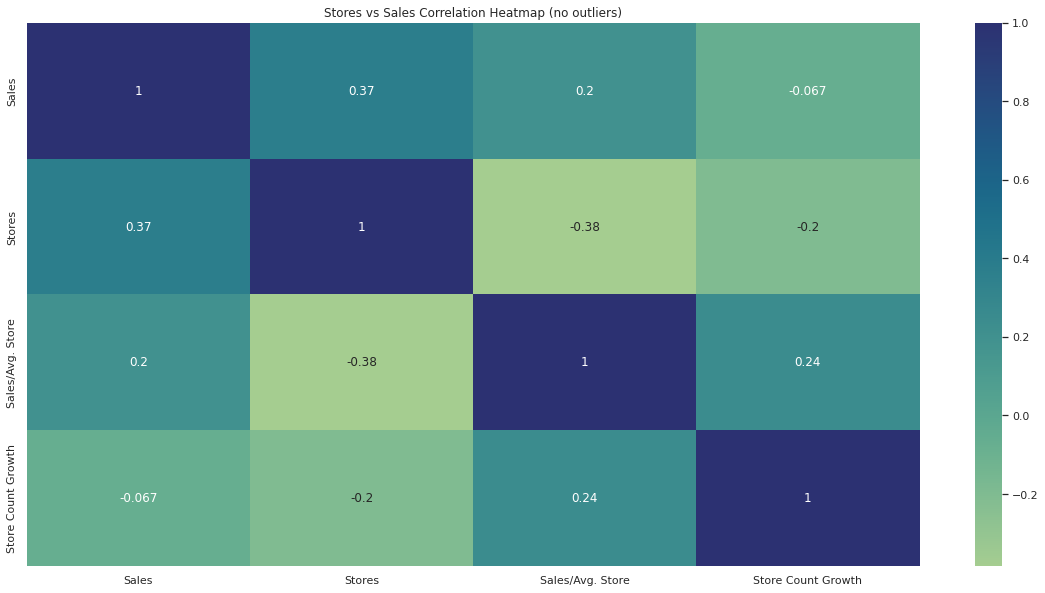

In [ ]:
sns.heatmap(df_no_store_outliers.corr(), cmap='crest', annot=True)
plt.title('Stores vs Sales Correlation Heatmap (no outliers)')


As expected, the correlation between **Sales** and **Stores** is 0.37. which increased without the outliers (high number of stores) and companies without physical stores. To conclude, there is no statistical evidence to argue that a *large number of stores will result in more sales*.

#### 5. ¿Cuál es el rango que existe entre las ventas?

Text(0.5, 0, 'Sales in USD Millions')

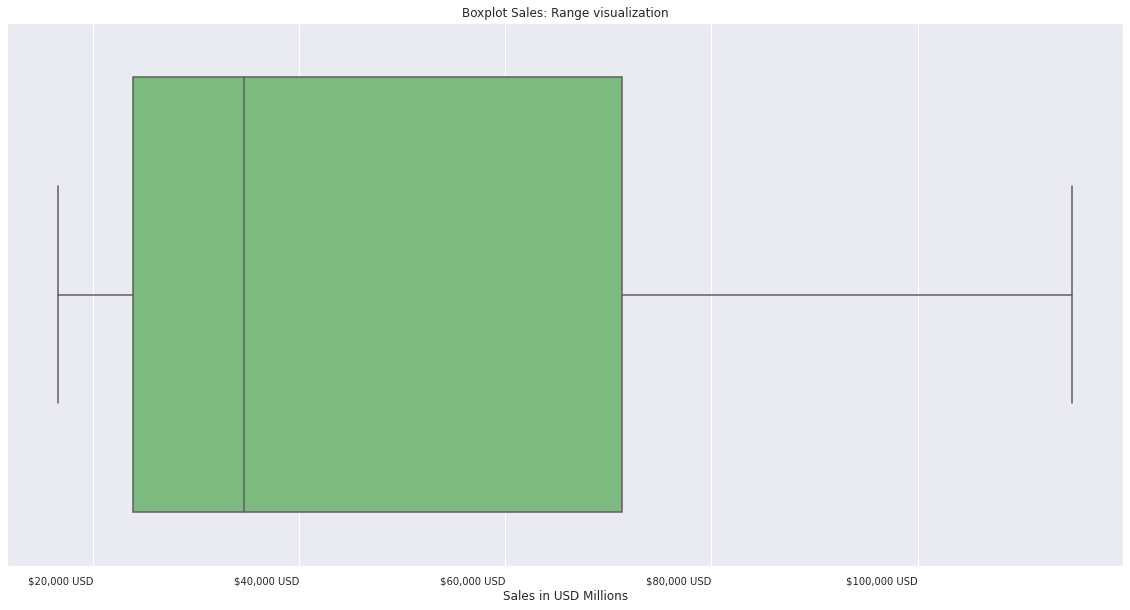

In [ ]:
g=sns.boxplot(data=df_no_dominant, x='Sales', palette='Greens')

#Formating X labels
xlabels = ['${:,.0f}'.format(x) + ' USD' for x in g.get_xticks()]
ticks_loc = g.get_xticks().tolist()
g.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
g.set_xticklabels(xlabels, horizontalalignment='right',fontsize='10')

plt.title('Boxplot Sales: Range visualization')
plt.xlabel('Sales in USD Millions')


In [ ]:
range_all=df.Sales.max() - df.Sales.min()
range_no_dominant=df_no_dominant.Sales.max() - df_no_dominant.Sales.min()

print(f"Rango de ventas compañias (dominante inclusive) ${range_all:,.2f}")
print(f"Rango de ventas compañias (dominante excluida) ${range_no_dominant:,.2f}")

Rango de ventas compañias (dominante inclusive) $641,527.00
Rango de ventas compañias (dominante excluida) $98,445.00


In [ ]:
df_no_dominant.median()

Sales                 34694.000000
Stores                 1800.000000
Sales/Avg. Store         25.341845
Store Count Growth        0.026687
dtype: float64

The range between *Sales* is:

- With the dominant company: **$641.527.0** Millions USD, which indicates a substantial dispersion in the Sales
- Without the dominant company: **$98.445** Millions USD, which still indicates a dispersion in the Sales but not as significant with the dominant company.

#### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

Text(0.5, 0, 'US Retailers - Company name')

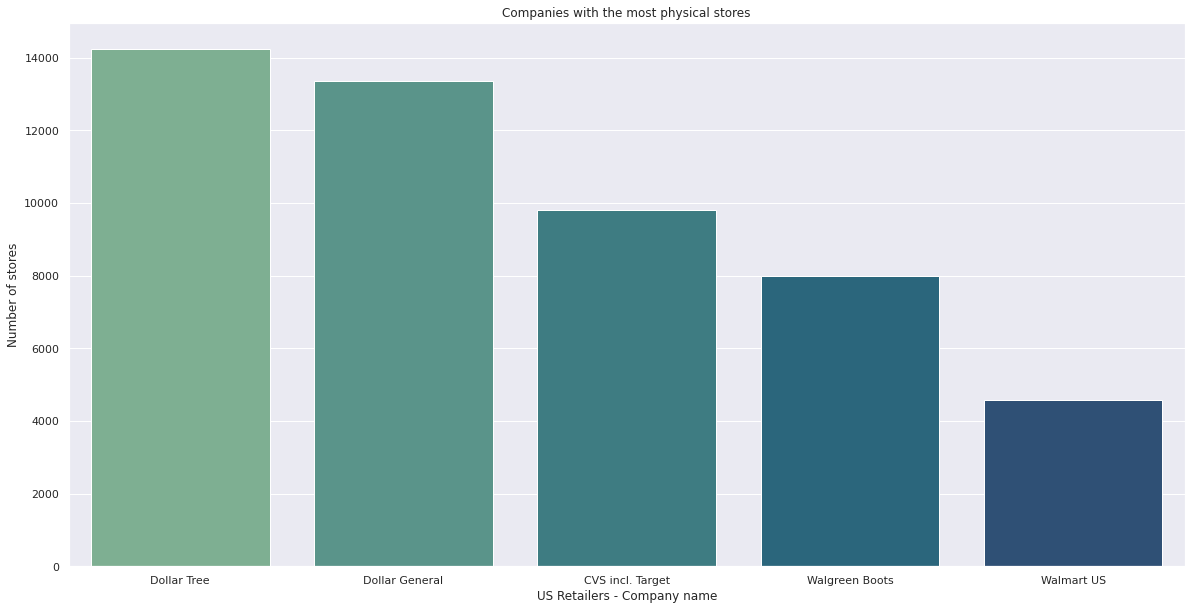

In [ ]:
df.sort_values(by=['Stores'], inplace=True, ascending=False)
stores=(df[:5]).reset_index(drop=True)

sns.barplot(data=stores, x='Company',y='Stores', palette='crest')
# Formating plot
plt.title('Companies with the most physical stores')
plt.ylabel('Number of stores')
plt.xlabel('US Retailers - Company name')

The companies with the most physical stores are **Dollar Tree, Dollar General, CCS incl. Target, Walgreen Boots** and **Walmart US**

In [ ]:
# Filtering stores vs sales

df.sort_values(by=['Sales'], inplace=True, ascending=False)
sales=df[:5].reset_index(drop=True)

pd.Series(stores.Company.isin(sales.Company).values, stores.Company.values)

stores = stores.assign(filter_result=stores['Company'].isin(sales['Company']).astype(int))

Text(0, 0.5, 'Sales in USD Millions')

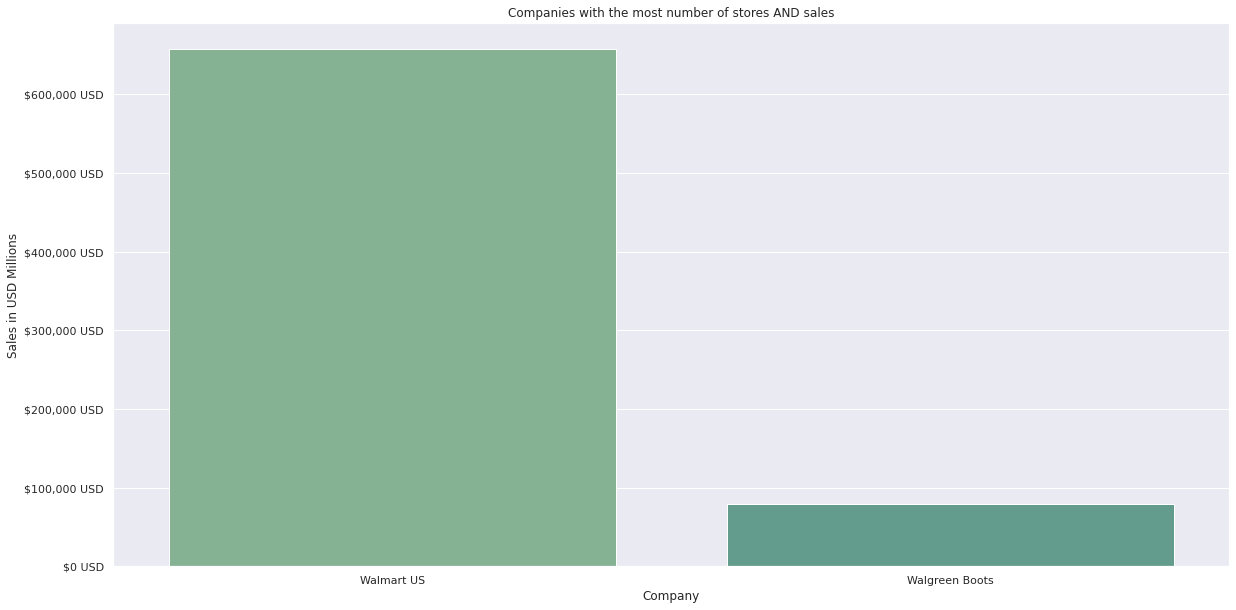

In [ ]:
g=sns.barplot(data=stores[stores['filter_result']==1].sort_values(by='Sales',ascending=False), x='Company',y='Sales')

ylabels = ['${:,.0f}'.format(x) + ' USD' for x in g.get_yticks()]
ticks_loc = g.get_yticks().tolist()
g.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
g.set_yticklabels(ylabels)

plt.title('Companies with the most number of stores AND sales')
plt.ylabel('Sales in USD Millions')

From the top 5 companies with the most physical stores, **Walmart US** and **Walgreen Boots** are also in the companies with the highest sales in USD Millions

### II. Optional questions

#### 7. Which category produced the biggest sales? (¿Qué categoría de compañía generó más ventas?)

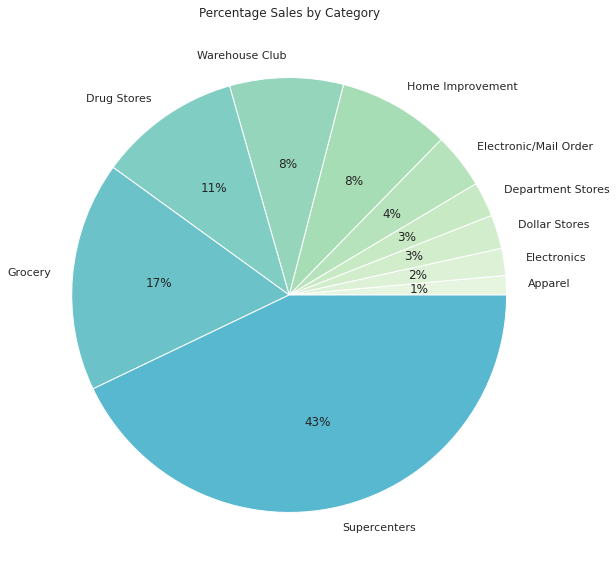

In [ ]:
# Sum sales by category
category_sales=df.groupby('Category').sum().reset_index().sort_values(by='Sales', ascending=True)

# Create plot
cmap = plt.get_cmap('GnBu')

colors = list(cmap(np.linspace(0.1,0.6, len(category_sales['Sales']))))
labels=category_sales['Category']
plt.pie(category_sales['Sales'], colors=colors, autopct = '%0.0f%%', labels=labels)
plt.title('Percentage Sales by Category')
plt.show()

The category with the most sales is **Supercenters** with **43%** of the total sales, followed by **Grocery** with **17%** and **Drug Stores** with **11%**. If we analyze the data without the dominant company:

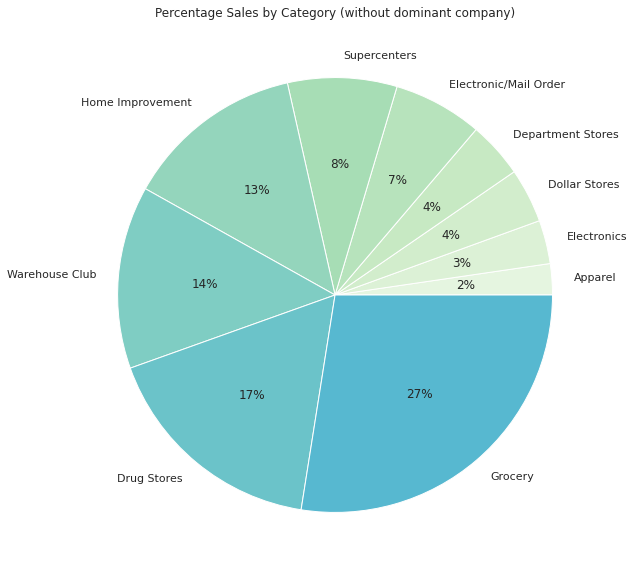

In [ ]:
# Sum sales by category
category_sales=df_no_dominant.groupby('Category').sum().reset_index().sort_values(by='Sales', ascending=True)

# Create plot
cmap = plt.get_cmap('GnBu')

colors = list(cmap(np.linspace(0.1,0.6, len(category_sales['Sales']))))
labels=category_sales['Category']
plt.pie(category_sales['Sales'], colors=colors, autopct = '%0.0f%%', labels=labels)
plt.title('Percentage Sales by Category (without dominant company)')
plt.show()

We can evidence that the category with the most sales is **Grocery**, with participation of **27%** in Sales

#### 8. Which is the company that regarding their physical stores produced the most sales? (¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?)

Text(0, 0.5, 'US Retailers - Company name')

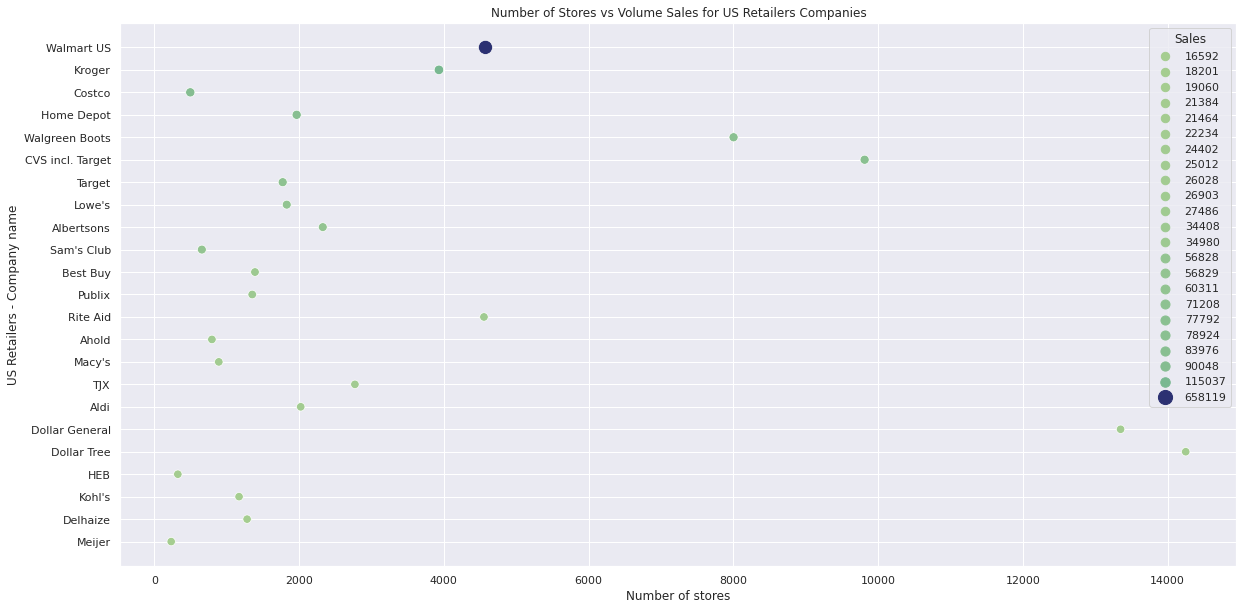

In [ ]:
sns.scatterplot(
    data=df[~df.Stores.isnull()], x="Stores", y="Company", hue="Sales", size="Sales",
    sizes=(70, 200), legend="full", palette="crest"
)

# Formating plot
plt.title('Number of Stores vs Volume Sales for US Retailers Companies')
plt.xlabel('Number of stores')
plt.ylabel('US Retailers - Company name')

Considering the relation **number of stores** and **Sales** for each company, we see that **Walmart US** possesses high sales participation, despite not having the most significant number of stores. To review how this analysis affects the other stores in more detail, we will remove Walmart as it is a dominant store. 

Text(0, 0.5, 'US Retailers - Company name')

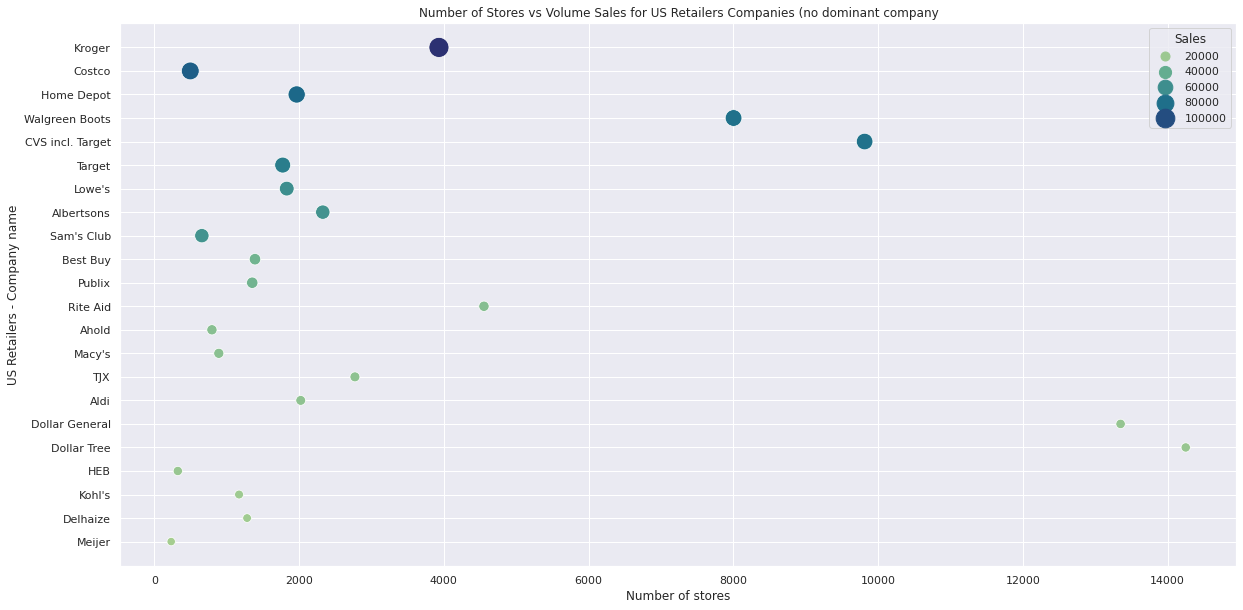

In [ ]:
sns.scatterplot(
    data=df_no_dominant[~df_no_dominant.Stores.isnull()], x="Stores", y="Company", hue="Sales", size="Sales",
    sizes=(70, 400), legend="brief", palette="crest"
)

# Formating plot
plt.title('Number of Stores vs Volume Sales for US Retailers Companies (no dominant company')
plt.xlabel('Number of stores')
plt.ylabel('US Retailers - Company name')

Analysing the figure above, **Kroger** has a high number of sales without having a considerable number of stores. Nevertheless, **Cotso** has the highest sales number, the third with the least number of stores. From these observations, we can conclude, once again, that the number of stores is not directly related to the volume of sales.

#### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [ ]:
df[df.Stores.isnull()].describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,2.000000,0.0,0.0,0.0
mean,54675.500000,NaN,NaN,NaN
std,24057.894016,NaN,NaN,NaN
min,37664.000000,NaN,NaN,NaN
25%,46169.750000,NaN,NaN,NaN
50%,54675.500000,NaN,NaN,NaN
75%,63181.250000,NaN,NaN,NaN
max,71687.000000,NaN,NaN,NaN


In [ ]:
df[~df.Stores.isnull()].median()

Sales                 34408.000000
Stores                 1828.000000
Sales/Avg. Store         25.997733
Store Count Growth        0.019520
dtype: float64

In [ ]:
df[df.Stores.isnull()].median()

Sales                 54675.5
Stores                    NaN
Sales/Avg. Store          NaN
Store Count Growth        NaN
dtype: float64

In [ ]:
df.loc[df.Stores.isnull(), 'Type'] = 'Online'
df.loc[~df.Stores.isnull(), 'Type'] = 'Physical'
df_no_dominant.loc[df_no_dominant.Stores.isnull(), 'Type'] = 'Online'
df_no_dominant.loc[~df_no_dominant.Stores.isnull(), 'Type'] = 'Physical'


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Text(0, 0.5, 'Sales in USD Millions')

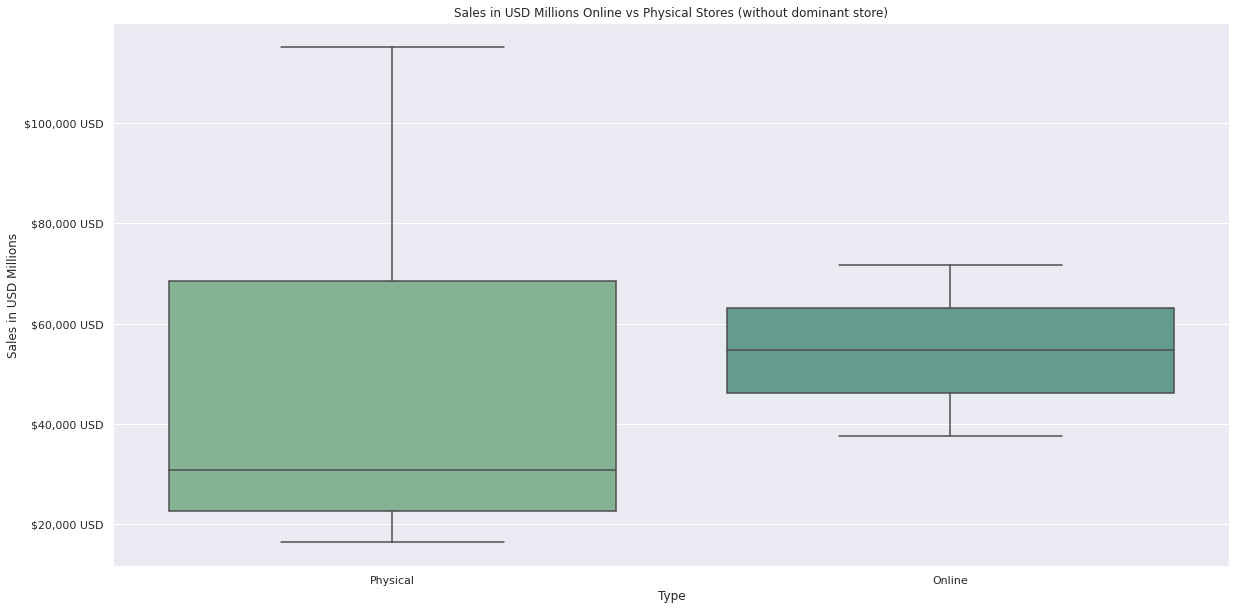

In [ ]:
g=sns.boxplot(data=df_no_dominant, x='Type',y='Sales')
ylabels = ['${:,.0f}'.format(x) + ' USD' for x in g.get_yticks()]
ticks_loc = g.get_yticks().tolist()
g.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
g.set_yticklabels(ylabels)

plt.title('Sales in USD Millions Online vs Physical Stores (without dominant store)')
plt.ylabel('Sales in USD Millions')

There are only two online stores in the dataset, with a median sales of **USD 54.675,4 million**. From the figure above, we can see that the range of online sales is in the upper range of the physical stores, indicating good sales performance despite not having physical stores.  

## III. Your own questions

#### 10. ¿La categoría de la tienda tiene un rol en el análisis Número de tiendas vs Ventas? ¿Cuáles tiendas se destacan?

Text(0, 0.5, 'US Retailers - Company name')

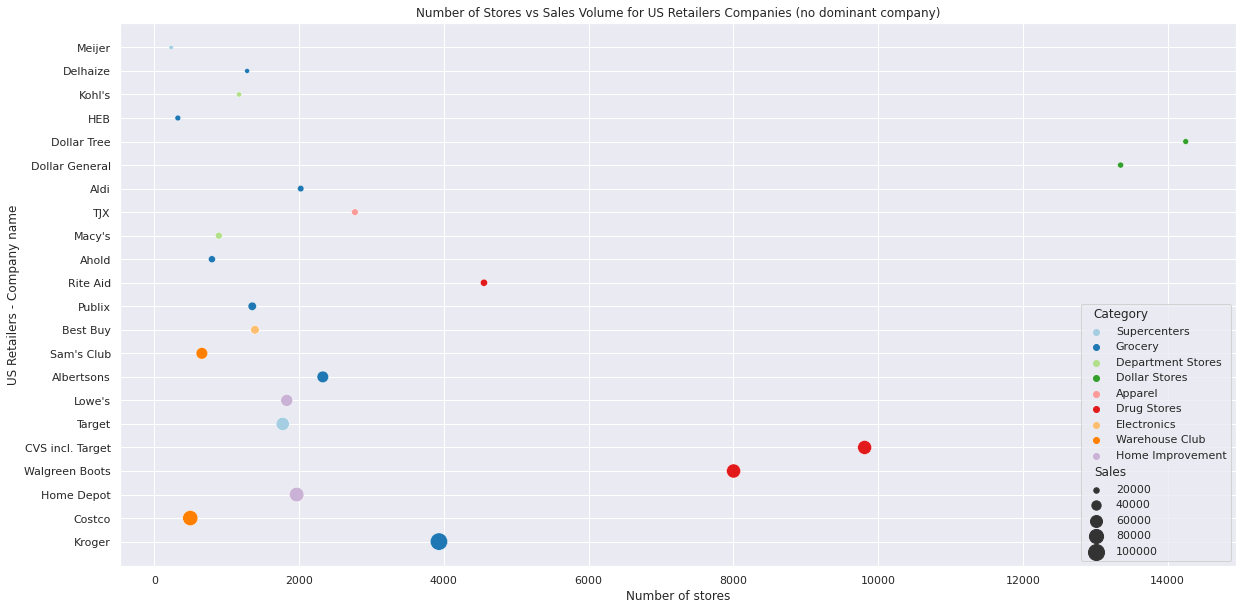

In [ ]:
sns.scatterplot(
    data=df_no_dominant[~df_no_dominant.Stores.isnull()].sort_values(by='Sales', ascending=True), x="Stores", y="Company", hue="Category", size="Sales",
    sizes=(20, 300), legend="brief", palette="Paired"
)

# Formating plot
plt.title('Number of Stores vs Sales Volume for US Retailers Companies (no dominant company)')
plt.xlabel('Number of stores')
plt.ylabel('US Retailers - Company name')

In the figure, we can see that **Drug Stores** have high sales with **Walgreen Boots** and **CVS incl. Target** in the range of 8000 to 10000 stores. It is also noticeable that **Dollar Stores** such as **Dollar General** and **Dollar Tree** despite having many stores, their sales are in the lower range. Finally, for the **Grocery** category, the relation of the number of stores and sales volume is dispersed.

#### 11. ¿Qué companías tuvieron el mayor crecimiento en su número de tiendas?

Text(0, 0.5, 'US Retailers - Company name')

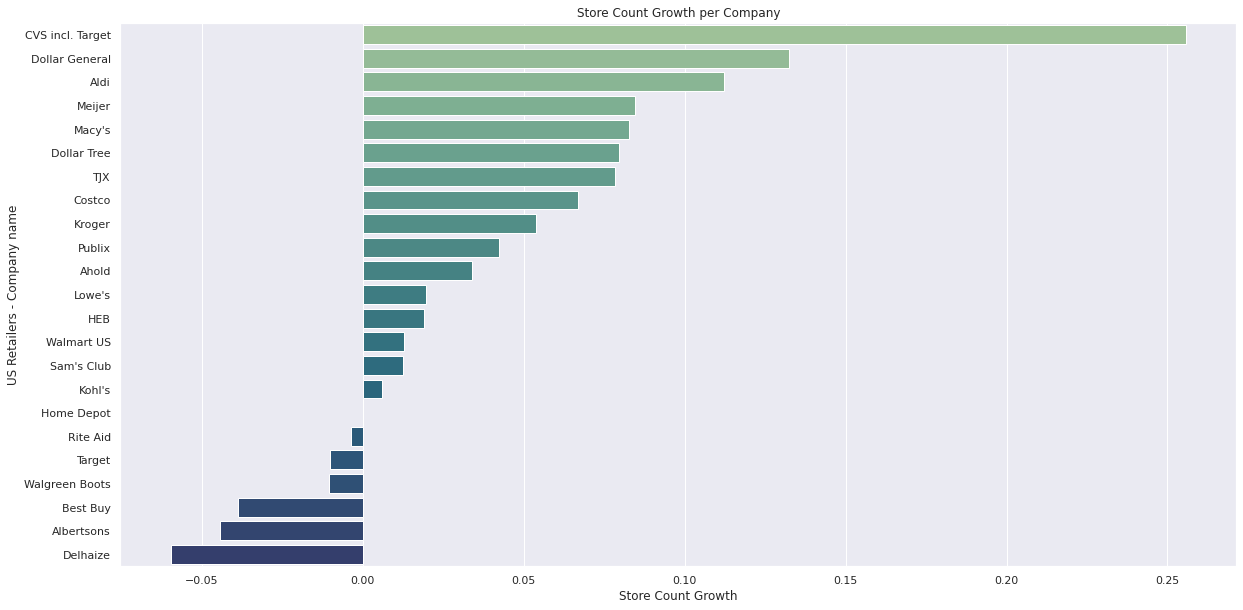

In [ ]:
sns.barplot(data=df[df['Type']=='Physical'].sort_values(by='Store Count Growth', ascending=False), x='Store Count Growth', y='Company', palette='crest')
# Formating plot
plt.title('Store Count Growth per Company')
plt.xlabel('Store Count Growth')
plt.ylabel('US Retailers - Company name')

The stores with the most **Store Count Growth** are **CSV incl. Target**, **Dollar General** and **Aldi**. 

#### 12. ¿Qué categorías poseen un alto volumen de ventas en relación con su crecimiento en tiendas?

Text(0, 0.5, 'Sales in Millions USD ')

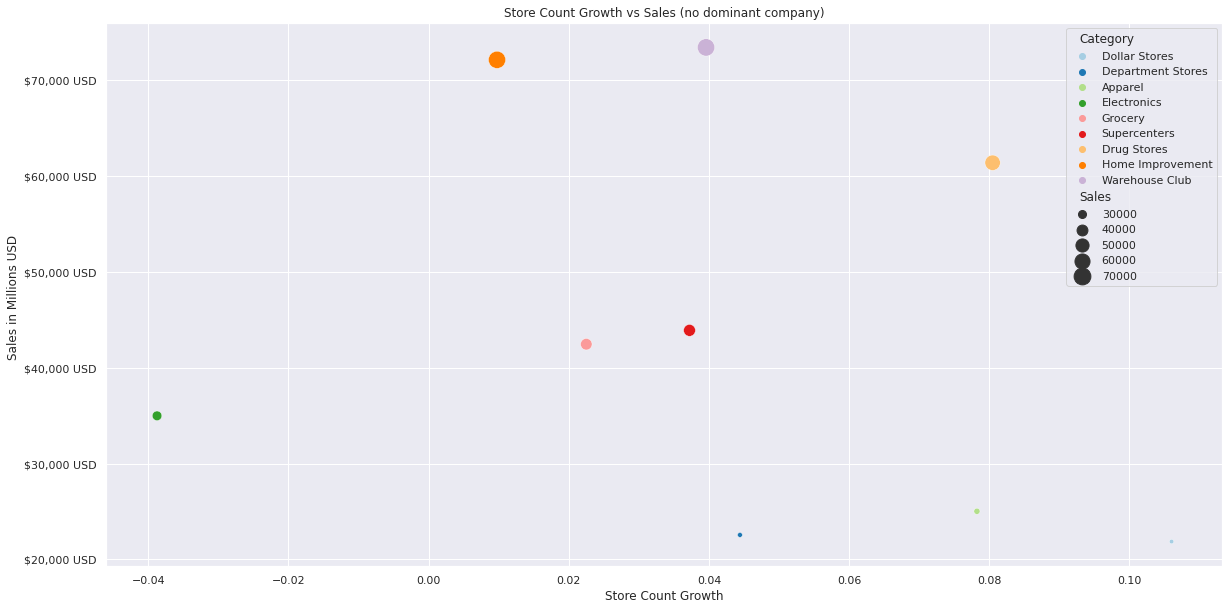

In [ ]:
by_category=df_no_dominant.groupby(df_no_dominant['Category']).mean().reset_index()

g=sns.scatterplot(
    data=by_category[~by_category.Stores.isnull()].sort_values(by='Sales', ascending=True), x="Store Count Growth", y="Sales", hue="Category", size="Sales",
    sizes=(20, 300), legend="brief", palette="Paired"
)

# Formating plot

ylabels = ['${:,.0f}'.format(x) + ' USD' for x in g.get_yticks()]
ticks_loc = g.get_yticks().tolist()
g.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
g.set_yticklabels(ylabels)
plt.title('Store Count Growth vs Sales (no dominant company)')
plt.xlabel('Store Count Growth')
plt.ylabel('Sales in Millions USD ')


The **Drug stores** category indicates a positive relation between **Sales** and **Store Count Growth**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b7305d0d-356f-45c3-8448-0230f1a1190c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>